In [1]:
#필요한 패키지 라이브러리 
import pandas as pd
import numpy as np
import re
import time
import datetime
from wordcloud import WordCloud, ImageColorGenerator
from nltk.stem import LancasterStemmer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation


from PIL import Image
from collections import Counter
import matplotlib.pyplot as plt

nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jiu14\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jiu14\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jiu14\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jiu14\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
#데이터 로드
df = pd.read_csv('all_review_.csv')
df

,Unnamed: 0,STAR,CONTENT
0,0,5,Seoul tower is very peacfull and one of clean ...
1,1,4,We have walked up and down It is a good walk ...
2,2,4,It was a bit late to open and it was raining ...
3,3,5,It was nice to be able to see the beautiful n...
4,4,5,Got there at dusk By the time we got into the ...
...,...,...,...
15460,15466,5,Dream of a very well planned place
15461,15467,5,Christmas organized the event very beautifully
15462,15468,4,Wow
15463,15469,5,Excelente experiencia


In [3]:
#결측데이터확인
df.isnull().sum()

Unnamed: 0    0
STAR          0
CONTENT       0
dtype: int64

In [4]:
#불용어 추가
stop_words = set(stopwords.words('english'))
add_stop_words = add_stop_words = ["'", ",", "'s", ":", ".", "?", "!","(",")","n't","korea","korean","good","like","awesome","perfect","nice","also","well","seoul","beautiful","wonderful","view","views","city","place","visit","just","lotte","world","went","lotte","tower","street","lot","lots","ddp","insadong","places","bookstore","bookstores","kyobo","lotte","aquarium","feel","animals","park","animals","coex","mall","great","pretty","best","go","see","really","many"]
for word in add_stop_words:
    stop_words.add(word)

In [5]:
text = df[['CONTENT']]

#토큰화
text['CONTENT'] = text.apply(lambda row: nltk.word_tokenize(row['CONTENT']), axis=1)

#불용어 처리
text['CONTENT'] = text['CONTENT'].apply(lambda x: [word.lower() for word in x])
text['CONTENT'] = text['CONTENT'].apply(lambda x: [word for word in x if word not in (stop_words)])
#표제어 추출
text['CONTENT'] = text['CONTENT'].apply(lambda x : [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2852\35457360.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['CONTENT'] = text.apply(lambda row: nltk.word_tokenize(row['CONTENT']), axis=1)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2852\35457360.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['CONTENT'] = text['CONTENT'].apply(lambda x: [word.lower() for word in x])
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2852\35457360.py:8: SettingWithCopyWarning: 
A 

In [6]:
text['CONTENT']

0        [peacfull, one, clean, life, fantastic, garden...
1        [walk, walk, one, side, stairs, path, forest, ...
2        [bite, late, open, rain, hard, wait, outside, ...
3                                            [able, night]
4        [get, dusk, time, get, top, dark, would, bette...
                               ...                        
15460                                        [dream, plan]
15461            [christmas, organize, event, beautifully]
15462                                                [wow]
15463                             [excelente, experiencia]
15464                                [people, take, night]
Name: CONTENT, Length: 15465, dtype: object

In [7]:
#nltk tag로 명사 추출
num=0
noun_word=[[] for i in range(len(text['CONTENT']))]
for i in text['CONTENT']:
    review_tag=nltk.pos_tag(i)
    for j in range(len(review_tag)):
        if review_tag[j][1]=='NNP' or review_tag[j][1]=='NNS' or review_tag[j][1]=='NN'or review_tag[j][1]=='NNPS':
            if review_tag[j][0] not in stop_words:
                noun_word[num].append(review_tag[j][0])
    num+=1
        
noun_word        

[['peacfull', 'life', 'garden', 'tree', 'book', 'list', 'spend', 'time'],
 ['walk', 'side', 'path', 'visibility', 'bite', 'cloudy', 'weather'],
 ['bite', 'rain', 'wait'],
 ['night'],
 ['time', 'dark', 'foothills', 'time', 'bus', 'wouldnt', 'stun'],
 ['time', 'mother', 'children', 'night', 'weekend', 'visitors'],
 ['years', 'joke', 'offer', 'attractions', 'palaces', 'anything'],
 ['overlook'],
 ['cool',
  'weather',
  'convenient',
  'walk',
  'morning',
  'exercise',
  'cafe',
  'space'],
 ['landmarks'],
 ['cable', 'car', 'eat', 'pork', 'cutlet', 'date'],
 ['point', 'worth'],
 ['koreas',
  'transmission',
  'beam',
  'television',
  'radio',
  'broadcast',
  'capital',
  'become'],
 ['doubledecker', 'bus', 'look'],
 ['buran'],
 ['ride'],
 ['aju', 'joa'],
 ['time',
  'cable',
  'car',
  'option',
  'way',
  'plenty',
  'grab',
  'something',
  'eat'],
 ['library', 'morning', 'minutes'],
 ['hike', 'plenty', 'restoraunts', 'experinece', 'right'],
 ['dont', 'cable', 'car', 'walk', 'im', 's

In [8]:
from gensim import corpora, models
import gensim

In [9]:
high_score_reviews=noun_word

In [10]:
high_score_reviews=[[y for y in x if not len(y)==1] for x in high_score_reviews]
dictionary =  corpora.Dictionary(high_score_reviews)

corpus=[dictionary.doc2bow(text) for text in high_score_reviews]
# 출현빈도가 적거나 자주 등장하는 단어는 제거
#dictionary.filter_extremes(no_below=5, no_above=0.06)

In [11]:
#coherence 값 확인
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

coherence_values=[]
for i in range(1,20):
    ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=i,id2word=dictionary)
    coherence_model_lda=CoherenceModel(model=ldamodel, texts=high_score_reviews, dictionary=dictionary,topn=10)
    coherence_lda=coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

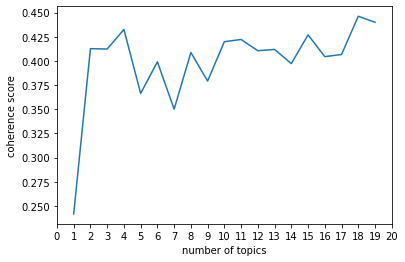

In [12]:
x=range(1,20)
plt.plot(x, coherence_values)
plt.xticks(np.arange(0,21,1))
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()

In [13]:
from gensim.models.callbacks import CoherenceMetric
from gensim.models.callbacks import PerplexityMetric

coherence_logger = CoherenceMetric(corpus=corpus,coherence="u_mass",logger='shell')
perplexity_logger = PerplexityMetric(corpus=corpus, logger='shell')

lda_model =gensim.models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=4, passes=15, callbacks=[coherence_logger, perplexity_logger])
coherence_model_lda=CoherenceModel(model=lda_model,texts=high_score_reviews,dictionary=dictionary,coherence='c_v')
coherence_lda=coherence_model_lda.get_coherence()
print("Number of Topic : 4 \nCoherence Score (c_v) : ",coherence_lda)
coherence_model_lda = CoherenceModel(model=lda_model, texts=high_score_reviews, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score (u_mass): ', coherence_lda)


'''for i in range(1,20):
    lda_model =gensim.models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=i, passes=15, callbacks=[coherence_logger, perplexity_logger])
    coherence_model_lda=CoherenceModel(model=lda_model,texts=high_score_reviews,dictionary=dictionary,coherence='c_v')
    coherence_lda=coherence_model_lda.get_coherence()
    print("\nCoherence Score (c_v) : ",coherence_lda)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=high_score_reviews, dictionary=dictionary, coherence="u_mass")
    coherence_lda = coherence_model_lda.get_coherence()
    print('Coherence Score (u_mass): ', coherence_lda)'''

Number of Topic : 5 
Coherence Score (c_v) :  0.5304134196732788
Coherence Score (u_mass):  -3.177255997766421


'for i in range(1,20):\n    lda_model =gensim.models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=i, passes=15, callbacks=[coherence_logger, perplexity_logger])\n    coherence_model_lda=CoherenceModel(model=lda_model,texts=high_score_reviews,dictionary=dictionary,coherence=\'c_v\')\n    coherence_lda=coherence_model_lda.get_coherence()\n    print("\nCoherence Score (c_v) : ",coherence_lda)\n    coherence_model_lda = CoherenceModel(model=lda_model, texts=high_score_reviews, dictionary=dictionary, coherence="u_mass")\n    coherence_lda = coherence_model_lda.get_coherence()\n    print(\'Coherence Score (u_mass): \', coherence_lda)'

In [28]:
lda_model =gensim.models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=18, passes=15, callbacks=[coherence_logger, perplexity_logger])
coherence_model_lda=CoherenceModel(model=lda_model,texts=high_score_reviews,dictionary=dictionary,coherence='c_v')
coherence_lda=coherence_model_lda.get_coherence()
print("Number of Topic : 18 \nCoherence Score (c_v) : ",coherence_lda)
coherence_model_lda = CoherenceModel(model=lda_model, texts=high_score_reviews, dictionary=dictionary, coherence="u_mass")
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score (u_mass): ', coherence_lda)

Number of Topic : 5 
Coherence Score (c_v) :  0.4074803300831573
Coherence Score (u_mass):  -5.7515649361564165


In [14]:
len(noun_word)

15465

In [15]:
perplexity_values=[]
for i in range(1,20):
    ldamodel=gensim.models.ldamodel.LdaModel(corpus,num_topics=i,id2word=dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

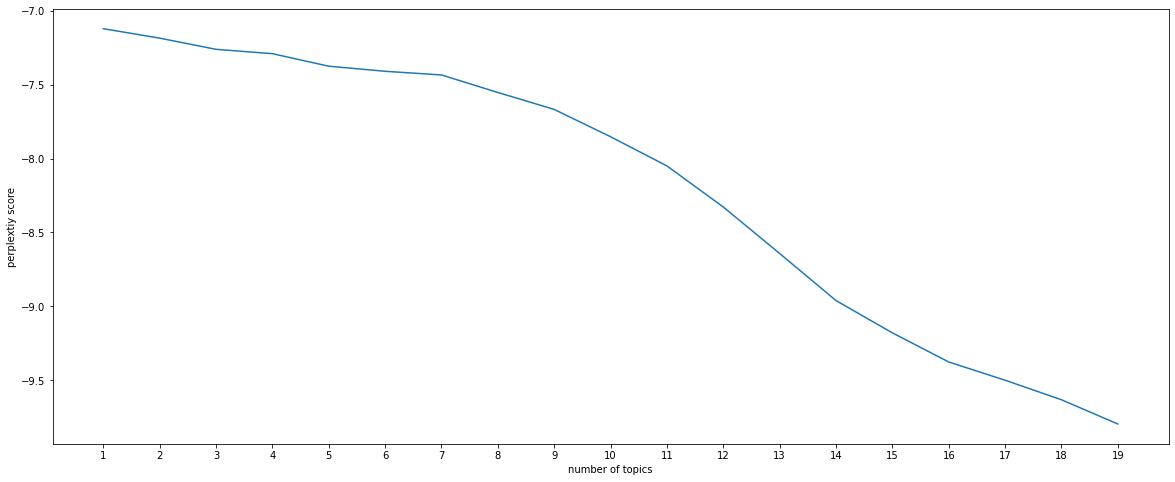

In [16]:
x=range(1,20)
plt.figure(figsize=(20,8))
plt.xticks(np.arange(0,21,1))
plt.plot(x, perplexity_values)
plt.xlabel("number of topics")
plt.ylabel("perplextiy score")
plt.show()

In [17]:
ldamodel=gensim.models.ldamodel.LdaModel(corpus, num_topics=4,alpha=0.1,id2word=dictionary)

In [18]:
ldamodel.print_topics(num_words=20)

[(0,
  '0.026*"shop" + 0.017*"time" + 0.015*"interest" + 0.012*"children" + 0.011*"tea" + 0.010*"area" + 0.010*"kid" + 0.010*"food" + 0.010*"fun" + 0.009*"house" + 0.009*"price" + 0.008*"tank" + 0.008*"restaurants" + 0.008*"family" + 0.008*"hours" + 0.008*"exhibit" + 0.007*"fish" + 0.007*"center" + 0.007*"people" + 0.007*"day"'),
 (1,
  '0.049*"shop" + 0.023*"area" + 0.017*"food" + 0.015*"souvenirs" + 0.014*"walk" + 0.014*"time" + 0.014*"zoo" + 0.013*"people" + 0.012*"galleries" + 0.011*"day" + 0.008*"restaurants" + 0.008*"experience" + 0.007*"aquariums" + 0.006*"side" + 0.006*"station" + 0.006*"look" + 0.006*"taste" + 0.006*"tea" + 0.006*"creatures" + 0.005*"sell"'),
 (2,
  '0.045*"shop" + 0.020*"market" + 0.017*"price" + 0.016*"food" + 0.013*"time" + 0.013*"area" + 0.010*"restaurants" + 0.010*"items" + 0.010*"store" + 0.009*"day" + 0.008*"walk" + 0.007*"souvenirs" + 0.006*"look" + 0.006*"hours" + 0.006*"line" + 0.006*"buy" + 0.006*"interest" + 0.006*"night" + 0.006*"people" + 0.006*"

In [19]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim_models.prepare(ldamodel,corpus,dictionary)
vis

C:\Users\jiu14\AppData\Roaming\Python\Python39\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.084372 -0.098790       1        1  33.872736
2     -0.010244  0.010606       2        1  27.813336
0      0.139929 -0.022837       3        1  20.253871
1     -0.045314  0.111021       4        1  18.060058, topic_info=           Term         Freq        Total Category  logprob  loglift
774      market  1011.000000  1011.000000  Default  30.0000  30.0000
124        shop  5470.000000  5470.000000  Default  29.0000  29.0000
3752        zoo   404.000000   404.000000  Default  28.0000  28.0000
1928  galleries   379.000000   379.000000  Default  27.0000  27.0000
42          car  1163.000000  1163.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
212     nothing   125.883729   379.399996   Topic4  -5.4568   0.6082
58         look   170.914273   874.621871   Topic4  -5.1510   0.0788
463       store   151.921113   873.610045   Topic4  -5.2688  -0.0378
541      things   151.122188   939.641737   Topic4  -5.2740  -0.1159
166       price   141.003034  1330.049653   Topic4  -5.3433  -0.5327

[315 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
3362      2  0.171421  accessories
3362      4  0.824965  accessories
1041      1  0.016633   activities
1041      2  0.166331   activities
1041      3  0.715224   activities
...     ...       ...          ...
2866      2  0.973528      workers
3752      1  0.004940          zoo
3752      2  0.002470          zoo
3752      3  0.002470          zoo
3752      4  0.992873          zoo

[591 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 2])

In [22]:
'''num_topic=3
keywordlist=[[] for i in range(num_topic)]
for i in range(num_topic):
    kk=ldamodel.show_topic(i,topn=15)
    kk2=list(kk)
    keywordlist.append(kk2)'''
kk=ldamodel.show_topic(0,topn=20)
kk2=pd.DataFrame(kk)
keyword1=kk2[0]

kk=ldamodel.show_topic(1,topn=20)
kk2=pd.DataFrame(kk)
keyword2=kk2[0]

kk=ldamodel.show_topic(2,topn=20)
kk2=pd.DataFrame(kk)
keyword3=kk2[0]

kk=ldamodel.show_topic(3,topn=20)
kk2=pd.DataFrame(kk)
keyword4=kk2[0]


KEYWORD=pd.DataFrame([keyword1,keyword2,keyword3,keyword4],index=['Topic 1','Topic 2','Topic 3','Topic 4']).transpose()


In [24]:
def make_topictable_per_doc(ldamodel,corpus):
    topic_table=pd.DataFrame()
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc=topic_list[0] if ldamodel.per_word_topics else topic_list
        doc = sorted(doc,key=lambda x: (x[1]), reverse=True)
        for j,(topic_num,prop_topic) in enumerate(doc):
            if j == 0:
                topic_table=topic_table.append(pd.Series([int(topic_num),round(prop_topic,4),topic_list]),ignore_index=True)
            else:
                break
    return(topic_table)

In [25]:
topictable=make_topictable_per_doc(ldamodel,corpus)
topictable=topictable.reset_index()
topictable.columns=['문서 번호','가장 비중이 높은 토픽','가장 높은 토픽의 비중','각 토픽의 비중']
topictable

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2852\1678881553.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_table=topic_table.append(pd.Series([int(topic_num),round(prop_topic,4),topic_list]),ignore_index=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2852\1678881553.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_table=topic_table.append(pd.Series([int(topic_num),round(prop_topic,4),topic_list]),ignore_index=True)


,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,0,0.5186,"[(0, 0.51864415), (1, 0.012127575), (2, 0.0121..."
1,1,1,0.4898,"[(0, 0.01352273), (1, 0.48982537), (2, 0.01352..."
2,2,1,0.9117,"[(0, 0.029416429), (1, 0.91174567), (2, 0.0294..."
3,3,3,0.7857,"[(0, 0.07143331), (1, 0.07143458), (2, 0.07144..."
4,4,3,0.9588,"[(0, 0.0137226125), (1, 0.013721225), (2, 0.01..."
...,...,...,...,...
15460,15460,2,0.8749,"[(0, 0.041689444), (1, 0.041680247), (2, 0.874..."
15461,15461,1,0.4614,"[(0, 0.45518056), (1, 0.4614496), (2, 0.041687..."
15462,15462,1,0.7856,"[(0, 0.07145956), (1, 0.7856479), (2, 0.071446..."
15463,15463,3,0.8748,"[(0, 0.04173435), (1, 0.041734356), (2, 0.0417..."


In [26]:
topictable.to_csv("topic_table.csv")

In [27]:
pyLDAvis.save_html(vis,"topic LDA_1.html")